In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
df = pd.read_csv('placement.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
141,7.19,18.0,0
819,6.93,10.0,0
254,6.70,64.0,0
881,7.72,42.0,0
814,7.78,17.0,1


In [12]:
df.shape

(1000, 3)

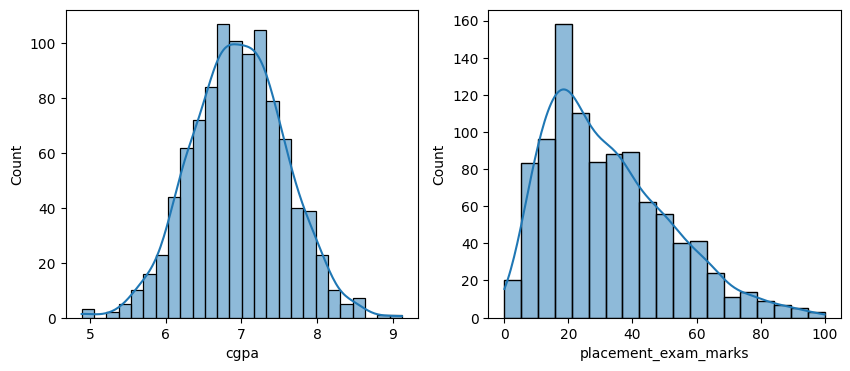

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)
plt.show()

In [19]:
df['placement_exam_marks'].skew

<bound method Series.skew of 0      26.0
1      38.0
2      40.0
3       8.0
4      17.0
       ... 
995    44.0
996    65.0
997    34.0
998    46.0
999    10.0
Name: placement_exam_marks, Length: 1000, dtype: float64>

In [20]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [21]:
# Finding the boundary values

print("highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())


highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [23]:
df[(df['cgpa'] < 5.11) | (df['cgpa'] > 8.80)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [24]:
new_df = df[(df['cgpa'] > 5.11) & (df['cgpa'] < 8.80)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [25]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [26]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [27]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [28]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [29]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [30]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping

In [32]:
## Capping

upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

upper_limit,lower_limit

(np.float64(8.808933625397168), np.float64(5.113546374602832))

In [33]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [34]:
df.shape

(1000, 4)

In [35]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64